In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_excel('Cleaned_results.xlsx')
data = pd.DataFrame(data)

print(data)

            date home_team away_team  year  home  away  goal_margin
0     1879-01-18       EU1       EU3  1879     1    -1            1
1     1880-03-15       EU3       EU1  1880    -1     1            1
2     1881-02-26       EU1       EU3  1881    -1     1            1
3     1882-03-13       EU3       EU1  1882     1    -1            2
4     1883-02-03       EU1       EU3  1883     1    -1            5
...          ...       ...       ...   ...   ...   ...          ...
8760  2021-07-20       NA2       AS1  2021    -1     1            2
8761  2021-07-24       NA1       NA2  2021     1    -1            3
8762  2021-07-24       AS1       NA2  2021     1    -1            1
8763  2021-07-25       NA1       NA1  2021    -1     1            2
8764  2021-07-29       NA1       NA1  2021     1    -1            1

[8765 rows x 7 columns]


In [3]:
#sample analysis on EU2
use_EU2 = []
for k in range (len(data)):
    if data['home_team'][k] == 'EU2' and data['away_team'][k] not in ['EU1', 'EU2', 'EU3']:
        use_EU2.append(k)
for g in range (len(data)):
    if data['away_team'][g] == 'EU2' and data['home_team'][g] not in ['EU1', 'EU2', 'EU3']:
        use_EU2.append(g)
data_eu2 = data.filter(items = use_EU2, axis = 0)
data_eu2 = data_eu2.replace(to_replace = r'^AS.$', value = 'Asia', regex = True)
data_eu2 = data_eu2.replace(to_replace = r'^SA.$', value = 'South_America', regex = True)
data_eu2 = data_eu2.replace(to_replace = r'^NA.$', value = 'North_America', regex = True)
data_eu2 = data_eu2.replace(to_replace = r'^AF.$', value = 'Africa', regex = True)
print(data_eu2)

            date      home_team      away_team  year  home  away  goal_margin
358   1924-11-02            EU2         Africa  1924     1    -1            1
476   1928-06-14            EU2         Africa  1928    -1     1            1
1133  1950-07-09            EU2  South_America  1950     0     0            0
1202  1952-08-10            EU2         Africa  1952     0     0            0
1210  1952-12-07            EU2  South_America  1952    -1     1            1
...          ...            ...            ...   ...   ...   ...          ...
8206  2017-07-02  South_America            EU2  2017    -1     1            1
8346  2018-06-09         Africa            EU2  2018    -1     1            1
8353  2018-06-16  South_America            EU2  2018    -1     1            1
8356  2018-06-17  South_America            EU2  2018     0     0            0
8362  2018-06-20           Asia            EU2  2018    -1     1            1

[399 rows x 7 columns]


In [4]:
eu = []
opponent = []
match_status = []
for x in range (len(data_eu2)):
    eu.append('EU2')
    if np.array(data_eu2['home_team'])[x] == 'EU2':
        opponent.append(np.array(data_eu2['away_team'])[x])
        match_status.append(np.array(data_eu2['home'])[x])
    else:
        opponent.append(np.array(data_eu2['home_team'])[x])
        match_status.append(np.array(data_eu2['away'])[x])
        
eu2 = pd.DataFrame(data = {'europe_tier2' : eu, 'opponent' : opponent, 'match_status' : match_status, 'goal_margin' : np.array(data_eu2['goal_margin']), 'year' : np.array(data_eu2['year'])})

print(eu2)

    europe_tier2       opponent  match_status  goal_margin  year
0            EU2         Africa             1            1  1924
1            EU2         Africa            -1            1  1928
2            EU2  South_America             0            0  1950
3            EU2         Africa             0            0  1952
4            EU2  South_America            -1            1  1952
..           ...            ...           ...          ...   ...
394          EU2  South_America             1            1  2017
395          EU2         Africa             1            1  2018
396          EU2  South_America             1            1  2018
397          EU2  South_America             0            0  2018
398          EU2           Asia             1            1  2018

[399 rows x 5 columns]


In [5]:
#making sub-data-frame wrt opponent's region
eu2_asia = []
eu2_north_america =[]
eu2_south_america =[]
eu2_africa = []

for y in range (len(eu2)):
    if opponent[y] == 'Asia':
        eu2_asia.append(y)
    elif opponent[y] == 'North_America':
        eu2_north_america.append(y)
    elif opponent[y] == 'South_America':
        eu2_south_america.append(y)
    if opponent[y] == 'Africa':
        eu2_africa.append(y)
#verifying
print(len(eu2_africa) + len(eu2_asia) + len(eu2_south_america) + len(eu2_north_america) )

399


In [6]:
#eu2_vs_asia 
eu2_vs_asia = eu2.filter(items = eu2_asia, axis = 0)

#eu2_vs_north_america 
eu2_vs_north_america = eu2.filter(items = eu2_north_america, axis = 0)

#eu2_vs_south_america 
eu2_vs_south_america = eu2.filter(items = eu2_south_america, axis = 0)

#eu1_vs_africa 
eu2_vs_africa = eu2.filter(items = eu2_africa, axis = 0)

eu2_vs_asia.to_excel("Eu_Tier2_vs_Asia.xlsx", index = False)
eu2_vs_north_america.to_excel("Eu_Tier2_vs_North_America.xlsx", index = False)
eu2_vs_south_america.to_excel("Eu_Tier2_vs_South_America.xlsx", index = False)
eu2_vs_africa.to_excel("Eu_Tier2_vs_Africa.xlsx", index = False)

    europe_tier2 opponent  match_status  goal_margin  year
27           EU2     Asia             1            1  1971
36           EU2     Asia             1            3  1974
65           EU2     Asia             1            4  1990
76           EU2     Asia             1            1  1994
78           EU2     Asia             1            1  1994
94           EU2     Asia             1            2  1998
104          EU2     Asia             0            0  1999
107          EU2     Asia             1            1  2001
113          EU2     Asia             1            8  2002
126          EU2     Asia             1            1  2005
139          EU2     Asia             0            0  2006
142          EU2     Asia             0            0  2006
154          EU2     Asia            -1            1  2007
157          EU2     Asia            -1            1  2008
159          EU2     Asia             1            1  2009
162          EU2     Asia             1            3  20

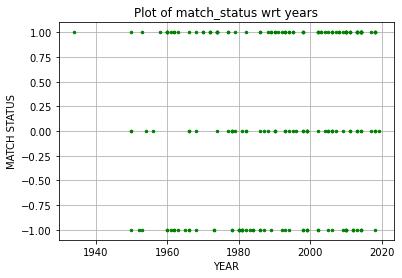

Text(0.5, 1.0, 'Histogram of match_status')

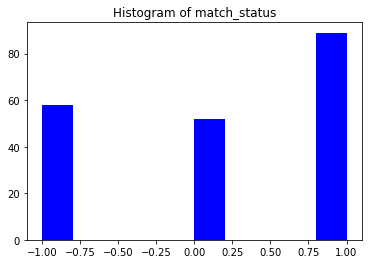

In [7]:
#checking
print(eu2_vs_asia)

#plot eu2_vs_south_america
plt.plot(eu2_vs_south_america['year'], eu2_vs_south_america['match_status'], 'o-', ms = 2.5, color = 'green', linestyle = '')
plt.xlabel('YEAR')
plt.ylabel('MATCH STATUS')
plt.title('Plot of match_status wrt years')
plt.grid(True)
plt.show()

plt.hist(eu2_vs_south_america['match_status'], color = 'blue')
plt.title('Histogram of match_status')